## <div align="center"> IF540 MACHINE LEARNING </div>
### <div align="center"> UAS : Neural Network </div>
### <div align="center"> Prediksi Tingkat Kasus Covid-19 Berdasarkan Tren Mobilitas Masyarakat <br/> di Asia Tenggara dengan menggunakan Algoritma Neural Network </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [6]:
import datetime
import uuid    

# Fill in your name and NIM
name1 = "Antonius Kevin Budi Saputra"
nim1 = "45444"
name2 = "Chrealvin"
nim2 = "45606"
name3 = "Ela Setiorini"
nim3 = "48258"
name4 = "Muhammad Farrel Prasetyo"
nim4 = "51515"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Kelompok J")
print("Name 1 \t\t: {}".format(name1))
print("NIM 1 \t\t: {}".format(nim1))
print("Name 2 \t\t: {}".format(name2))
print("NIM 2 \t\t: {}".format(nim2))
print("Name 3 \t\t: {}".format(name3))
print("NIM 3 \t\t: {}".format(nim3))
print("Name 4 \t\t: {}".format(name4))
print("NIM 4 \t\t: {}".format(nim4))
print("Start \t\t: {}".format(myDate))
print("Device ID \t: {}".format(myDevice))

Kelompok J
Name 1 		: Antonius Kevin Budi Saputra
NIM 1 		: 45444
Name 2 		: Chrealvin
NIM 2 		: 45606
Name 3 		: Ela Setiorini
NIM 3 		: 48258
Name 4 		: Muhammad Farrel Prasetyo
NIM 4 		: 51515
Start 		: 2022-12-07 21:56:09.272669
Device ID 	: 48ade69c-763f-11ed-9973-068db3350b0b



---

### Dataset yang dipakai:

1. [COVID-19 Stats and Mobility Trends] – sumber : [https://www.kaggle.com/datasets/diogoalex/covid19-stats-and-trends]

### Hasil kerja

---

#### Import Library

In [1]:
import sys
import tensorflow.keras as tk
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [2]:
covid = pd.read_csv("COVID-19.csv", index_col='date', parse_dates=['date'])

In [3]:
covid.head()

,iso,country,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,...,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,AE,United Arab Emirates,4.0,5.0,1.0,0.0,0.0,2.0,8,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-16,AE,United Arab Emirates,4.0,4.0,1.0,1.0,1.0,2.0,9,0,...,5042.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-17,AE,United Arab Emirates,1.0,5.0,1.0,-1.0,1.0,2.0,9,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-18,AE,United Arab Emirates,1.0,5.0,1.0,-2.0,0.0,2.0,9,0,...,6693.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-19,AE,United Arab Emirates,0.0,4.0,1.0,-2.0,-1.0,2.0,9,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886


In [10]:
np.unique(covid['country'])

array(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Aruba', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali',
       'Malta', 'Mauritius', 'Mexico', 'Moldova',

### Take SouthEast Asia Data

In [11]:
# covid_ind = covid[covid['country']=='Indonesia']
# covid_mly = covid[covid['country']=='Malaysia']
# covid_sg = covid[covid['country']=='Singapore']
# covid_th = covid[covid['country']=='Thailand']
# covid_vt = covid[covid['country']=='Vietnam']
# covid_laos = covid[covid['country']=='Laos']
# covid_ph = covid[covid['country']=='Philipines']
# covid_cam = covid[covid['country']=='Cambodia']

In [12]:
# data = pd.concat([covid_ind, covid_mly, covid_sg, covid_th, covid_vt, covid_laos, covid_ph, covid_cam])

In [13]:
# np.unique(data['country'])

array(['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Singapore',
       'Thailand', 'Vietnam'], dtype=object)

In [14]:
# covid = data

### Check Correlation between Data

In [4]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.410305,-0.641868,0.788686,0.731100,0.605142,0.032780,0.026222,-0.420921,0.025696,0.024201,0.036085,0.037147,-0.027623,0.024093,0.030031,-0.117287,-0.050682,-0.104515
parks_percent_change_from_baseline,0.410305,1.000000,-0.471642,0.516251,0.410472,0.197375,-0.042821,-0.031956,-0.303640,-0.011589,0.046682,0.041887,0.031770,0.184860,-0.074064,-0.062753,0.201056,0.339687,0.132992
residential_percent_change_from_baseline,-0.641868,-0.471642,1.000000,-0.770550,-0.747110,-0.748314,0.013658,0.024674,0.619642,-0.035086,-0.005497,0.013363,-0.059719,0.093482,0.046800,0.104371,0.092110,-0.045429,0.112505
retail_and_recreation_percent_change_from_baseline,0.788686,0.516251,-0.770550,1.000000,0.829413,0.700838,-0.041157,-0.057367,-0.646824,0.034294,0.096643,0.090655,0.221332,-0.116150,-0.058861,-0.018584,-0.232884,-0.125499,-0.238970
transit_stations_percent_change_from_baseline,0.731100,0.410472,-0.747110,0.829413,1.000000,0.708633,-0.012715,-0.034726,-0.604809,-0.014244,0.044184,0.039109,0.104290,-0.155482,0.024649,-0.009297,-0.257160,-0.140656,-0.268542
workplaces_percent_change_from_baseline,0.605142,0.197375,-0.748314,0.700838,0.708633,1.000000,-0.017857,-0.031230,-0.536681,-0.017662,0.014748,0.007149,0.029808,-0.138436,-0.003261,0.000298,-0.225709,-0.164193,-0.219318
confirmed_cases,0.032780,-0.042821,0.013658,-0.041157,-0.012715,-0.017857,1.000000,0.939144,0.090894,0.967014,0.797584,0.815639,0.783652,0.078513,0.433253,-0.028950,0.102316,0.078580,0.074325
confirmed_deaths,0.026222,-0.031956,0.024674,-0.057367,-0.034726,-0.031230,0.939144,1.000000,0.111263,0.944412,0.752527,0.774977,0.732166,0.090035,0.386039,-0.043245,0.136056,0.112915,0.108688
gov_response_stringency_index,-0.420921,-0.303640,0.619642,-0.646824,-0.604809,-0.536681,0.090894,0.111263,1.000000,0.049506,0.045560,0.075800,-0.010309,0.047121,0.074079,-0.004693,0.111771,-0.022173,0.106921
total_tests,0.025696,-0.011589,-0.035086,0.034294,-0.014244,-0.017662,0.967014,0.944412,0.049506,1.000000,0.849749,0.869753,0.812567,0.164300,0.570107,-0.050605,0.158590,0.082025,0.085765


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53377 entries, 2020-02-15 to 2021-03-23
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   iso                                                 52974 non-null  object 
 1   country                                             53377 non-null  object 
 2   grocery_and_pharmacy_percent_change_from_baseline   52362 non-null  float64
 3   parks_percent_change_from_baseline                  52177 non-null  float64
 4   residential_percent_change_from_baseline            52072 non-null  float64
 5   retail_and_recreation_percent_change_from_baseline  52405 non-null  float64
 6   transit_stations_percent_change_from_baseline       52534 non-null  float64
 7   workplaces_percent_change_from_baseline             53222 non-null  float64
 8   confirmed_cases                                     53377 n

In [6]:
covid.columns

Index(['iso', 'country', 'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline', 'confirmed_cases',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'],
      dtype='object')

### Drop unused Data

In [7]:
covid.drop(columns=['iso', 'country', 
       'gov_response_stringency_index', 'people_fully_vaccinated', 'population',
       'gdp_ppp_per_capita', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'], inplace=True)

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53377 entries, 2020-02-15 to 2021-03-23
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   52362 non-null  float64
 1   parks_percent_change_from_baseline                  52177 non-null  float64
 2   residential_percent_change_from_baseline            52072 non-null  float64
 3   retail_and_recreation_percent_change_from_baseline  52405 non-null  float64
 4   transit_stations_percent_change_from_baseline       52534 non-null  float64
 5   workplaces_percent_change_from_baseline             53222 non-null  float64
 6   confirmed_cases                                     53377 non-null  int64  
 7   confirmed_deaths                                    53377 non-null  int64  
 8   total_tests                                         19013 n

In [9]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline      1015
parks_percent_change_from_baseline                     1200
residential_percent_change_from_baseline               1305
retail_and_recreation_percent_change_from_baseline      972
transit_stations_percent_change_from_baseline           843
workplaces_percent_change_from_baseline                 155
confirmed_cases                                           0
confirmed_deaths                                          0
total_tests                                           34364
total_vaccinations                                    49283
people_vaccinated                                     49697
dtype: int64

### Drop NaN data from Total Tests

In [10]:
covid.dropna(subset=['total_tests'], inplace=True)

In [11]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.431116,-0.685919,0.797356,0.722440,0.606101,0.012325,0.002767,0.025696,0.001380,-0.010061
parks_percent_change_from_baseline,0.431116,1.000000,-0.536342,0.542739,0.464559,0.190874,-0.039376,-0.019369,-0.011589,0.048521,0.036546
residential_percent_change_from_baseline,-0.685919,-0.536342,1.000000,-0.787377,-0.788722,-0.757719,-0.008475,0.001241,-0.035086,-0.031910,-0.011204
retail_and_recreation_percent_change_from_baseline,0.797356,0.542739,-0.787377,1.000000,0.808346,0.666361,0.009774,-0.003502,0.034294,0.142269,0.138383
transit_stations_percent_change_from_baseline,0.722440,0.464559,-0.788722,0.808346,1.000000,0.682040,-0.023783,-0.044885,-0.014244,0.010662,-0.009435
workplaces_percent_change_from_baseline,0.606101,0.190874,-0.757719,0.666361,0.682040,1.000000,-0.020388,-0.039248,-0.017662,-0.007342,-0.024172
confirmed_cases,0.012325,-0.039376,-0.008475,0.009774,-0.023783,-0.020388,1.000000,0.967558,0.967014,0.838323,0.853817
confirmed_deaths,0.002767,-0.019369,0.001241,-0.003502,-0.044885,-0.039248,0.967558,1.000000,0.944412,0.845418,0.867678
total_tests,0.025696,-0.011589,-0.035086,0.034294,-0.014244,-0.017662,0.967014,0.944412,1.000000,0.849749,0.869753
total_vaccinations,0.001380,0.048521,-0.031910,0.142269,0.010662,-0.007342,0.838323,0.845418,0.849749,1.000000,0.992881


In [12]:
covid.fillna(0, inplace=True)

### Check Correlation between Data Again

In [13]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.430283,-0.685278,0.797148,0.722320,0.606009,0.012244,0.002670,0.025607,0.012966,0.008186
parks_percent_change_from_baseline,0.430283,1.000000,-0.534659,0.539207,0.462363,0.190039,-0.039329,-0.019315,-0.011544,-0.012607,-0.011183
residential_percent_change_from_baseline,-0.685278,-0.534659,1.000000,-0.786812,-0.786997,-0.757429,-0.008447,0.001274,-0.035054,-0.004539,0.001495
retail_and_recreation_percent_change_from_baseline,0.797148,0.539207,-0.786812,1.000000,0.808619,0.666850,0.009516,-0.003810,0.033992,0.005765,-0.003579
transit_stations_percent_change_from_baseline,0.722320,0.462363,-0.786997,0.808619,1.000000,0.682959,-0.024237,-0.045421,-0.014762,-0.021638,-0.027881
workplaces_percent_change_from_baseline,0.606009,0.190039,-0.757429,0.666850,0.682959,1.000000,-0.020475,-0.039351,-0.017755,-0.008114,-0.013460
confirmed_cases,0.012244,-0.039329,-0.008447,0.009516,-0.024237,-0.020475,1.000000,0.967558,0.967014,0.717485,0.725628
confirmed_deaths,0.002670,-0.019315,0.001274,-0.003810,-0.045421,-0.039351,0.967558,1.000000,0.944412,0.670972,0.684047
total_tests,0.025607,-0.011544,-0.035054,0.033992,-0.014762,-0.017755,0.967014,0.944412,1.000000,0.679485,0.689439
total_vaccinations,0.012966,-0.012607,-0.004539,0.005765,-0.021638,-0.008114,0.717485,0.670972,0.679485,1.000000,0.990299


In [14]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
residential_percent_change_from_baseline              0
retail_and_recreation_percent_change_from_baseline    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
confirmed_cases                                       0
confirmed_deaths                                      0
total_tests                                           0
total_vaccinations                                    0
people_vaccinated                                     0
dtype: int64

In [15]:
covid.shape

(19013, 11)

In [16]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19013 entries, 2020-02-16 to 2021-03-23
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   19013 non-null  float64
 1   parks_percent_change_from_baseline                  19013 non-null  float64
 2   residential_percent_change_from_baseline            19013 non-null  float64
 3   retail_and_recreation_percent_change_from_baseline  19013 non-null  float64
 4   transit_stations_percent_change_from_baseline       19013 non-null  float64
 5   workplaces_percent_change_from_baseline             19013 non-null  float64
 6   confirmed_cases                                     19013 non-null  int64  
 7   confirmed_deaths                                    19013 non-null  int64  
 8   total_tests                                         19013 n

### Move Confirmed_Case Data to last Column

In [17]:
moved_column = covid.pop("confirmed_cases")

In [18]:
covid.insert(10, "confirmed_cases", moved_column)

In [19]:
covid.head()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated,confirmed_cases
date,,,,,,,,,,,
2020-02-16,4.0,4.0,1.0,1.0,1.0,2.0,0,5042.0,0.0,0.0,9
2020-02-18,1.0,5.0,1.0,-2.0,0.0,2.0,0,6693.0,0.0,0.0,9
2020-02-21,2.0,6.0,1.0,-3.0,0.0,-1.0,0,8894.0,0.0,0.0,11
2020-02-22,2.0,4.0,1.0,-2.0,-2.0,3.0,0,12990.0,0.0,0.0,13
2020-02-27,5.0,-1.0,1.0,1.0,-1.0,3.0,0,14315.0,0.0,0.0,19


### Collect Covid DF Data as Values

In [20]:
covid_data = covid.values

In [32]:
covid_data

array([[ 1.0000e+00, -8.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  3.4000e+01],
       [ 2.0000e+00, -5.0000e+00,  2.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  3.4000e+01],
       [ 1.0000e+00, -3.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  3.5000e+01],
       ...,
       [ 2.1000e+01, -1.9000e+01, -2.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  2.7594e+04],
       [ 2.0000e+01, -2.0000e+01, -3.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  2.7713e+04],
       [ 2.0000e+01, -1.2000e+01, -3.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  2.7803e+04]])

In [21]:
X = covid_data[:,0:10]

In [22]:
X.shape

(19013, 10)

In [23]:
Y = covid_data[:, 10]

In [24]:
Y[:10]

array([ 9.,  9., 11., 13., 19., 21., 27., 29., 30., 45.])

In [25]:
np.max(Y)

30104069.0

In [26]:
np.min(Y)

0.0

### Plot data to see Data Scatters/Spreading

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

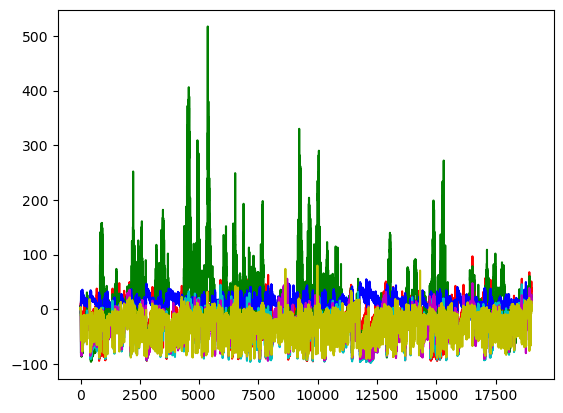

In [28]:
plt.plot(X[:,0], color="r", label="grocery")
plt.plot(X[:,1], color="g", label="park")
plt.plot(X[:,2], color="b", label="residential")
plt.plot(X[:,3], color="c", label="retail")
plt.plot(X[:,4], color="m", label="transit")
plt.plot(X[:,5], color="y", label="workplace")
plt.show()

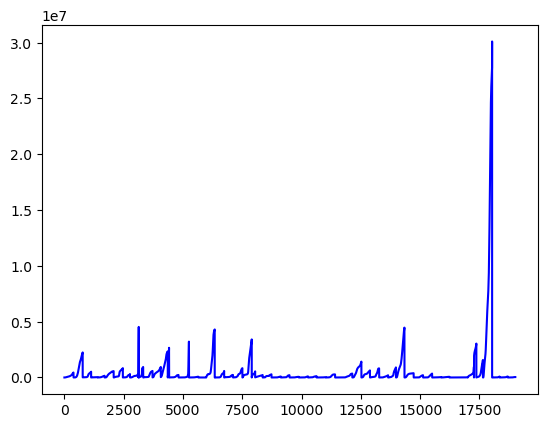

In [29]:
plt.plot(Y, color="b", label='Confirmed_case')
plt.show()

### Scale data with MinMaxScaler for Input and Output Attribute

In [30]:
mms = MinMaxScaler()
scaled = mms.fit_transform(covid_data)

### Devide Data to X and Y Variable

In [31]:
X_scaled = scaled[:,0:10]

In [32]:
Y_scaled = scaled[:,10]

### Plot data to see Scaled Data Scatters/Spreading

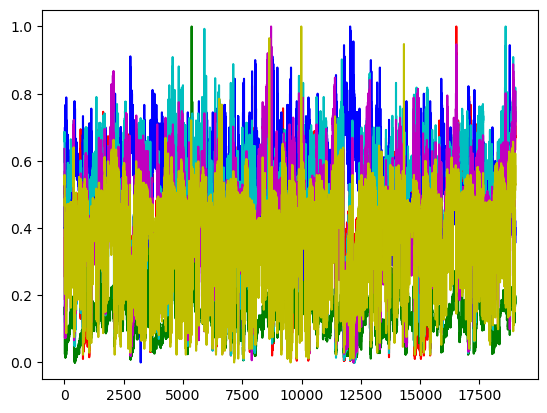

In [33]:
plt.plot(X_scaled[:,0], color="r", label="grocery")
plt.plot(X_scaled[:,1], color="g", label="park")
plt.plot(X_scaled[:,2], color="b", label="residential")
plt.plot(X_scaled[:,3], color="c", label="retail")
plt.plot(X_scaled[:,4], color="m", label="transit")
plt.plot(X_scaled[:,5], color="y", label="workplace")
plt.show()

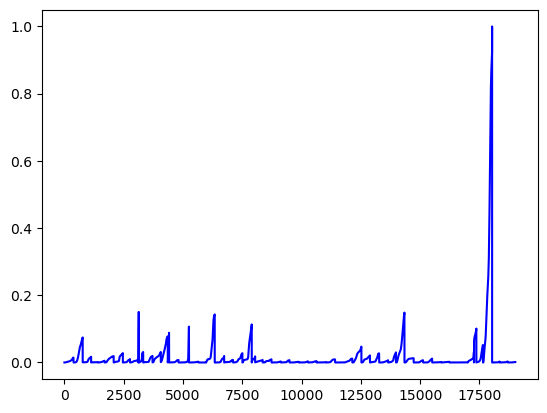

In [34]:
plt.plot(Y_scaled, color="b", label='Confirmed_case')
plt.show()

### Splitting Data to 80% Training Data, 10% Test Data, 10% Validation Data

##### Random State
    Digunakan untuk memastikan supaya setiap kali dilakuakn splitting data, maka pembagian data akan selalu sama dan tidak ada akan menimbulkan variabel test, train, dan validation yang berbeda

In [35]:
X_train, X_vt, Y_train, Y_vt = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [36]:
X_test, X_val, Y_test, Y_val = train_test_split(X_vt, Y_vt, test_size=0.5, random_state=42)

In [37]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(15210, 10) (1902, 10) (1901, 10) (15210,) (1902,) (1901,)


### Import Required Library

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Model Initialization

In [39]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(10,)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

2022-12-08 08:41:10.503641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile Model

In [40]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Start Training and Fitting the Model

In [41]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=100, 
          validation_data=(X_val, Y_val))

Epoch 1/100
119/119 [==============================] - 1s 3ms/step - loss: -60854692.0000 - accuracy: 0.0041 - val_loss: -198913904.0000 - val_accuracy: 0.0053
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: -1220361856.0000 - accuracy: 0.0041 - val_loss: -2139880832.0000 - val_accuracy: 0.0053
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: -6468690944.0000 - accuracy: 0.0041 - val_loss: -8362724864.0000 - val_accuracy: 0.0053
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: -19288150016.0000 - accuracy: 0.0041 - val_loss: -21226133504.0000 - val_accuracy: 0.0053
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: -41952239616.0000 - accuracy: 0.0041 - val_loss: -42031415296.0000 - val_accuracy: 0.0053
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: -77318807552.0000 - accuracy: 0.0041 - val_loss: -73185034240.0000 - val_accuracy: 0.0053
Epoch 7/100
119/119

### Evaluate Model to Test Data

In [42]:
model.evaluate(X_test, Y_test)

60/60 [==============================] - 0s 697us/step - loss: -178043037417472.0000 - accuracy: 0.0037


[-178043037417472.0, 0.003682272508740425]

### Prediction For X_Test Data

In [43]:
model.predict(X_test)

60/60 [==============================] - 0s 662us/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [44]:
test = model.predict(X_test)

60/60 [==============================] - 0s 608us/step


### Plot Model to see Model Movement

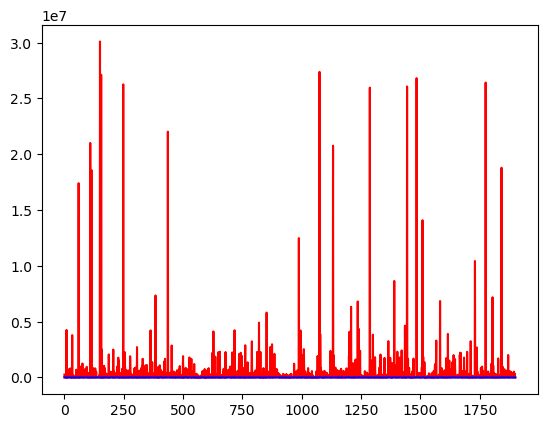

In [45]:
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

### Convert from scaled data to Real Value for Prediction Result and Real Data (X_test, Y_test)

In [46]:
test_value = []
for t in test:
    x = np.min(Y)
    y = np.max(Y) - np.min(Y)
    test_value.append((t * y) + x)
test_value

[array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=float32),
 array([30104068.], dtype=fl

In [47]:
Y_test_value = []
for t in Y_test:
    x = np.min(Y)
    y = np.max(Y) - np.min(Y)
    Y_test_value.append((t * y) + x)
Y_test_value

[7842471223328.0,
 1270813168766.0,
 3860064143456.0,
 46450578467.0,
 812298093827.0,
 489070704974.0,
 3543790794542.0,
 172074858404.0,
 101631336944.0,
 128196311384222.0,
 279064719630.0,
 125714592144.0,
 4216255487864.0,
 1571793650628.0,
 30585734104.0,
 241524945587.0,
 16032764859882.0,
 580406450320.0,
 547894055800.0,
 22217405003380.0,
 9578542778489.0,
 2521336195026.0,
 10919919884991.0,
 8991513432989.0,
 386536245960.0,
 24610979529570.0,
 95791147558.0,
 34469159005.0,
 75320380638.0,
 49009424332.0,
 1788392427083.0,
 4365090005.0,
 101149671840.0,
 114277695082072.0,
 473898254198.0,
 2298596188495.0,
 5756740906732.0,
 54036803855.0,
 3975182103312.0,
 5582016890256.0,
 125955424696.0,
 1659938364660.0,
 191943543944.0,
 810672474101.0,
 49430881298.0,
 120416276.0,
 829276788743.0,
 855467328773.0,
 49069632470.0,
 54097011993.0,
 20899147821870.0,
 447677610099.0,
 1527600877336.0,
 1882858995605.0,
 1041871724021.0,
 4279082679867.0,
 127821876974.0,
 5348439418

### Plot Model based on Real Data

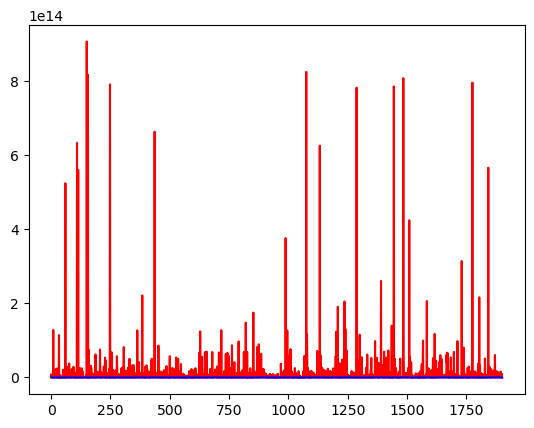

In [48]:
plt.plot(Y_test_value, color='r', label="RealData")
plt.plot(test_value, color='b', label='Predicted Test')
plt.show()

### Plot Model Loss

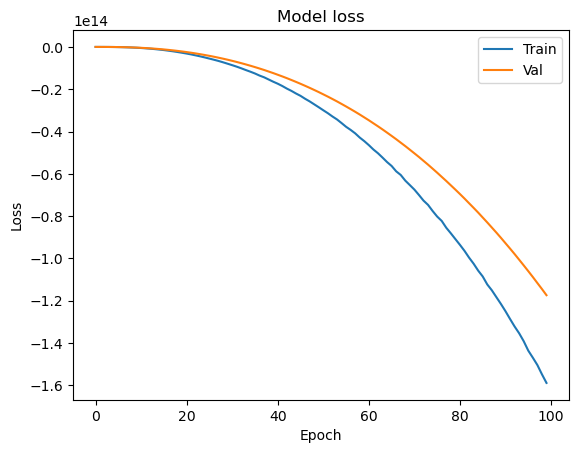

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Plot Model Accuracy

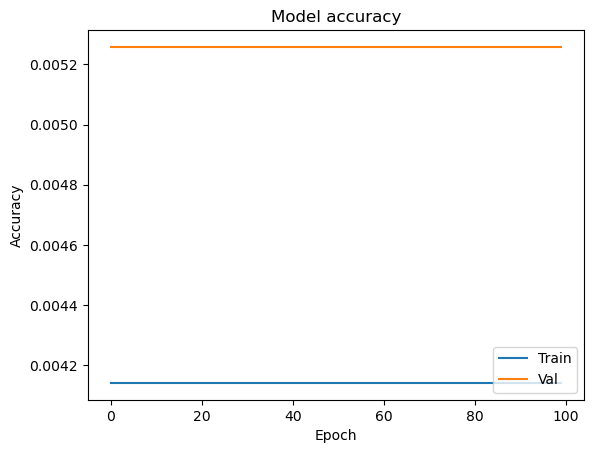

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Train Model with different Input and Hidden Layer

In [51]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dropout(0.8),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
476/476 [==============================] - 4s 7ms/step - loss: -14698449681252352.0000 - accuracy: 0.0041 - val_loss: -74755409025433600.0000 - val_accuracy: 0.0053
Epoch 2/10
476/476 [==============================] - 3s 7ms/step - loss: -1116888859297185792.0000 - accuracy: 0.0041 - val_loss: -2638159403592712192.0000 - val_accuracy: 0.0053
Epoch 3/10
476/476 [==============================] - 4s 7ms/step - loss: -11238534958010073088.0000 - accuracy: 0.0041 - val_loss: -17841385956804919296.0000 - val_accuracy: 0.0053
Epoch 4/10
476/476 [==============================] - 3s 7ms/step - loss: -49060419937597652992.0000 - accuracy: 0.0041 - val_loss: -63969595300100702208.0000 - val_accuracy: 0.0053
Epoch 5/10
476/476 [==============================] - 3s 7ms/step - loss: -147643635238598344704.0000 - accuracy: 0.0041 - val_loss: -168848165581002637312.0000 - val_accuracy: 0.0053
Epoch 6/10
476/476 [==============================] - 3s 7ms/step - loss: -340995499364030873600

### Plot Model for X Test and Y Test

60/60 [==============================] - 0s 2ms/step


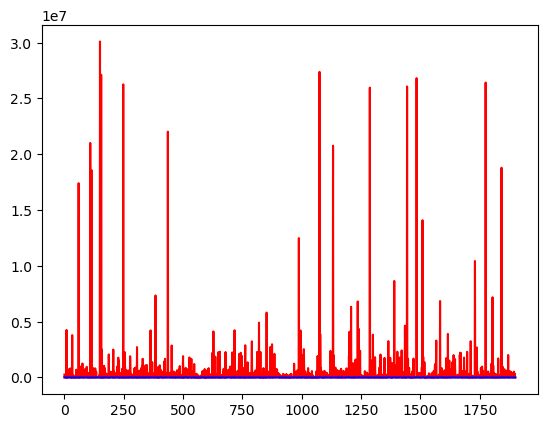

In [52]:
test = model_2.predict(X_test)
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

### Plot Model Loss

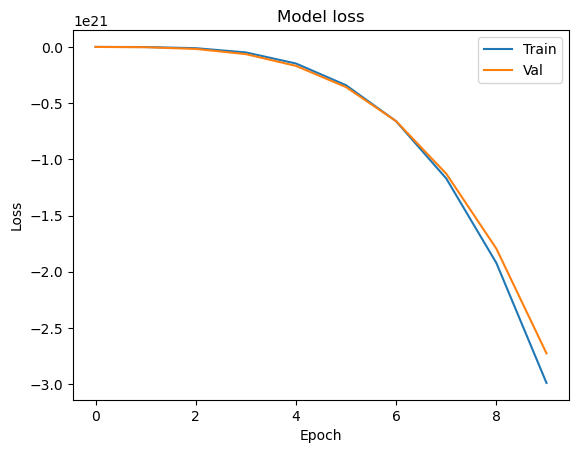

In [53]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Plot Model Accuracy

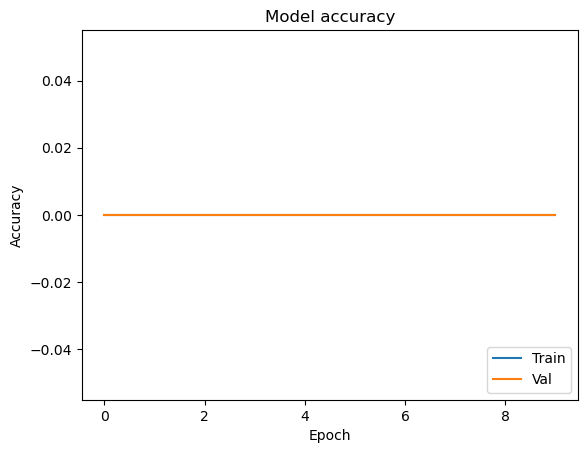

In [65]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [66]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Kelompok J")
print("Name 1 \t\t: {}".format(name1))
print("NIM 1 \t\t: {}".format(nim1))
print("Name 2 \t\t: {}".format(name2))
print("NIM 2 \t\t: {}".format(nim2))
print("Name 3 \t\t: {}".format(name3))
print("NIM 3 \t\t: {}".format(nim3))
print("Name 4 \t\t: {}".format(name4))
print("NIM 4 \t\t: {}".format(nim4))
print("Time-stamp \t: {}".format(myDate))
print("Device ID \t: {}".format(myDevice))

I certify that this is my own work.
Signed by:
Kelompok J
Name 1 		: Antonius Kevin Budi Saputra
NIM 1 		: 45444
Name 2 		: Chrealvin
NIM 2 		: 45606
Name 3 		: Ela Setiorini
NIM 3 		: 48258
Name 4 		: Muhammad Farrel Prasetyo
NIM 4 		: 51515
Time-stamp 	: 2022-12-07 21:56:16.422250
Device ID 	: 48ade69c-763f-11ed-9973-068db3350b0b


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [67]:
!jupyter nbconvert --to html "./IF540L_ProjectUAS_Kelompok J.ipynb" --output-dir="./"

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook ./IF540L_ProjectUAS_Kelompok J.ipynb to html
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/nbformat/__init__.py:92: DuplicateCellId: Non-unique cell id '44dc37e5' detected. Corrected to 'a0bbb87b'.
  validate(nb)
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/nbformat/__init__.py:92: DuplicateCellId: Non-unique cell id '44dc37e5' detected. Corrected to '236fc8c7'.
  validate(nb)
[NbConvertApp] Writing 1313688 bytes to IF540L_ProjectUAS_Kelompok J.html
